<a href="https://colab.research.google.com/github/Elish-Ab/AI-Mastery-10x-Week1/blob/task-3/Task_3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
news_df = pd.read_csv('raw_analyst_ratings.csv')  # Replace with your file path
stock_df = pd.read_csv('AAPL_historical_data.csv')  # Replace with your file path


In [89]:
news_df['date'] = pd.to_datetime(news_df['date']).dt.date.astype(str)
stock_df['date'] = pd.to_datetime(stock_df['Date']).dt.date.astype(str)

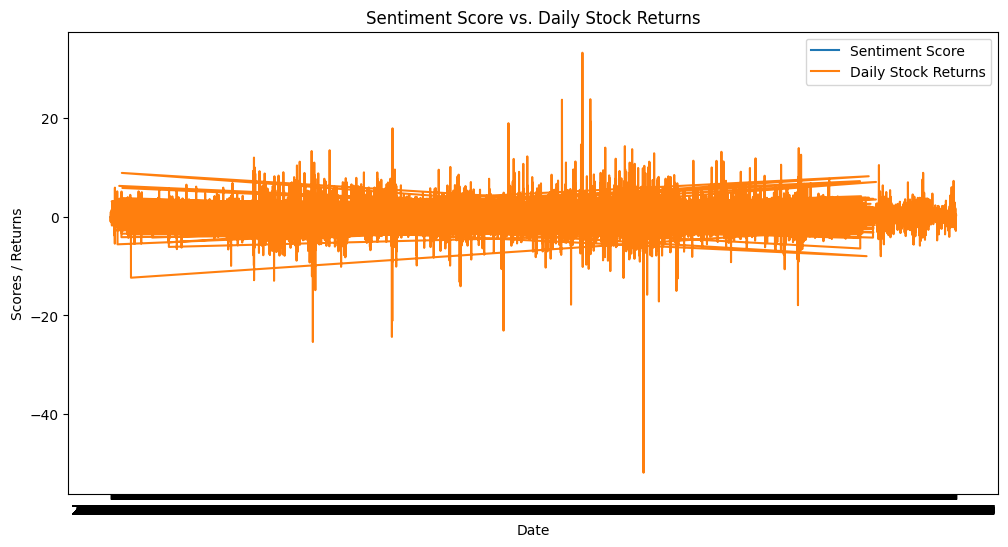

Correlation between daily news sentiment scores and stock returns:
Correlation Coefficient: 0.005874350309848358


In [91]:

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment_score'] = news_df['headline'].apply(get_sentiment)

# Calculate Stock Movements
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100

# Merge Data
merged_data = pd.merge(stock_df, news_df, on='date', how='inner')

# Aggregate Sentiments
avg_sentiment_scores = merged_data.groupby('date')['sentiment_score'].mean().reset_index()

# Align Data for Correlation Calculation
aligned_data = merged_data.groupby('date').agg({'sentiment_score': 'mean', 'daily_return': 'mean'}).reset_index()

# Calculate Correlation
correlation = np.corrcoef(aligned_data['sentiment_score'], aligned_data['daily_return'].dropna())[0, 1]

# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(avg_sentiment_scores['date'], avg_sentiment_scores['sentiment_score'], label='Sentiment Score')
plt.plot(stock_df['date'], stock_df['daily_return'], label='Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Scores / Returns')
plt.title('Sentiment Score vs. Daily Stock Returns')
plt.legend()
plt.show()

# Output
print("Correlation between daily news sentiment scores and stock returns:")
print(f"Correlation Coefficient: {correlation}")